# Figure S1h/S1i

In [102]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

import phate
import proplot as pplt
import matplotlib
import matplotlib.colors as mcolors
import scprep
import scipy
import seaborn
from scipy.stats import pearsonr
from sklearn.decomposition import PCA

pd. set_option('display.max_columns', 60)
pd. set_option('display.max_rows', 100) 

In [103]:
all_data = pd.read_csv('/...../df_gd_all.txt', sep='\t')
all_data

/Users/callumnattress/opt/anaconda3/envs/phate_trellis/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3460: DtypeWarning:

Columns (51,53) have mixed types.Specify dtype option on import or set low_memory=False.



,pHH3,RFP,Anti-mCherry,Vimentin,B7C23,EpCAM,B7C18,PanCK,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,DNA_1,DNA_2,194_Cisplatin,NKp44,Date,Patient,Culture,gd_donor,Transduction,Treatment,Replicate,Time,Batch,Cell_type
0,2.112668,1.072871,1.784029,36.151936,0.732375,0.000000,1.565820,2.242769,0.000000,0.000000,3.449325,15.808734,7.545413,0.484244,1.622991,13.585954,23.493839,10.253730,3.051339,61.927704,6.037919,5.555997,17.510517,3.120044,172.314102,23.197765,0.234269,0.000000,2.445910,33.498081,0.940899,5.350353,7.302702,132.305099,21.675066,0.106663,40.808945,2.020658,2.162645,13.745032,2.528904,2.067870,16.492302,0.000000,7.492941,0.809636,1188.507935,2177.531006,21.608774,5.084100,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
1,0.527830,0.000000,0.000000,40.617779,0.000000,0.850179,0.000000,2.896378,1.821622,0.000000,0.000000,12.363726,94.904320,10.781694,12.443624,60.355770,53.698391,51.307049,1.147771,60.007214,5.578413,22.690882,12.429095,0.000000,249.278717,40.863148,4.385691,0.430424,2.954062,42.227524,2.573740,2.424393,11.418387,211.959457,31.795179,2.262900,14.396840,0.000000,9.581733,2.549168,0.764066,0.512237,10.084972,0.000000,11.921869,0.973840,1148.690063,2135.051025,11.153146,0.000000,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
2,0.000000,0.272097,1.360897,12.533136,0.000000,0.000000,0.000000,2.684406,4.605258,0.000000,0.000000,69.111595,78.055313,0.000000,0.000000,3.013540,54.984116,12.758614,0.905969,0.000000,1.819490,0.000000,5.411917,0.000000,234.678146,9.723784,3.305206,6.483822,4.072320,28.807552,0.386954,2.221904,0.000000,16.533901,83.216873,0.000000,8.262188,1.027620,1.759348,9.905869,0.000000,0.000000,12.013611,12.136374,11.801295,1.850765,1070.468506,1976.926392,16.781635,0.542236,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
3,0.000000,0.052713,0.000000,33.661613,0.000000,0.317290,0.000000,0.166774,1.022511,0.857797,0.000000,12.005932,38.411808,2.619150,0.174478,8.227551,28.066032,20.863403,0.000000,44.467892,0.809206,9.240581,15.271775,1.525572,168.543442,33.865623,0.000000,7.686261,0.000000,38.135387,0.000000,2.225263,0.888110,123.516968,17.426126,0.572136,25.417891,0.000000,2.044804,3.667158,2.677844,0.610078,24.022224,3.468787,16.100355,4.137844,833.138000,1527.750000,15.340094,1.247573,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
4,0.000000,0.425003,0.033936,72.471931,1.903905,3.386223,0.391445,0.000000,4.443120,0.000000,0.000000,61.478252,99.313812,3.002901,0.677532,10.290436,32.765141,31.240295,0.907393,38.185310,3.654915,26.866573,14.178667,0.000000,174.524155,53.488743,1.074959,2.647377,1.578681,23.625860,0.000000,1.547652,0.906195,150.692383,39.870945,0.000000,35.415035,0.019462,6.027297,6.952862,2.204513,2.269700,8.026061,0.000000,7.649633,9.150639,972.849915,1659.628662,3.891569,0.850994,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819340,3.357316,0.000000,0.000000,30.944431,1.578278,4.320772,0.209392,2.607019,1.500951,826.765747,0.000000,16.769331,181.358490,1.952625,28.016953,0.000000,7.833639,20.198891,1.138615,42.455948,7.152562,0.905693,26.804211,12.240554,904.377502,33.007812,3.237805,0.869414,4.508156,25.763971,0.519497,11.010099,24.943974,133.471329,21.747068,0.000000,20.992437,0.000000,13.945458,16.602606,2.728806,19.485020,186.508606,7.385914,4.425802,10.664576,1601.611450,2732.432861,31.009453,1.381068,20230209,X,gd,E,NT,IL15,C,48,Batch9,gds
5819341,0.000000,0.000000,0.000000,25.492655,1.366826,0.000000,0.807238,0.000000,0.845823,1.745316,0.000000,43.865810,73.141312,0.422409,5.922387,0.000000,9.262834,46.660622,0.000

In [104]:
pre_data = all_data.drop([

 'RFP',
 'Anti-mCherry',
 'EpCAM',
 'PanCK',
    'DNA_1',
    'DNA_2',
    '194_Cisplatin',
    'Date',
    'Patient',
    'Culture',
    'Transduction',
    'Treatment',
    'Replicate',
    'Time',
    'Cell_type',
    'gd_donor',
    'Batch',    
    
],axis=1, inplace=False)
pre_data

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44
0,2.112668,36.151936,0.732375,1.565820,0.000000,0.000000,3.449325,15.808734,7.545413,0.484244,1.622991,13.585954,23.493839,10.253730,3.051339,61.927704,6.037919,5.555997,17.510517,3.120044,172.314102,23.197765,0.234269,0.000000,2.445910,33.498081,0.940899,5.350353,7.302702,132.305099,21.675066,0.106663,40.808945,2.020658,2.162645,13.745032,2.528904,2.067870,16.492302,0.000000,7.492941,0.809636,5.084100
1,0.527830,40.617779,0.000000,0.000000,1.821622,0.000000,0.000000,12.363726,94.904320,10.781694,12.443624,60.355770,53.698391,51.307049,1.147771,60.007214,5.578413,22.690882,12.429095,0.000000,249.278717,40.863148,4.385691,0.430424,2.954062,42.227524,2.573740,2.424393,11.418387,211.959457,31.795179,2.262900,14.396840,0.000000,9.581733,2.549168,0.764066,0.512237,10.084972,0.000000,11.921869,0.973840,0.000000
2,0.000000,12.533136,0.000000,0.000000,4.605258,0.000000,0.000000,69.111595,78.055313,0.000000,0.000000,3.013540,54.984116,12.758614,0.905969,0.000000,1.819490,0.000000,5.411917,0.000000,234.678146,9.723784,3.305206,6.483822,4.072320,28.807552,0.386954,2.221904,0.000000,16.533901,83.216873,0.000000,8.262188,1.027620,1.759348,9.905869,0.000000,0.000000,12.013611,12.136374,11.801295,1.850765,0.542236
3,0.000000,33.661613,0.000000,0.000000,1.022511,0.857797,0.000000,12.005932,38.411808,2.619150,0.174478,8.227551,28.066032,20.863403,0.000000,44.467892,0.809206,9.240581,15.271775,1.525572,168.543442,33.865623,0.000000,7.686261,0.000000,38.135387,0.000000,2.225263,0.888110,123.516968,17.426126,0.572136,25.417891,0.000000,2.044804,3.667158,2.677844,0.610078,24.022224,3.468787,16.100355,4.137844,1.247573
4,0.000000,72.471931,1.903905,0.391445,4.443120,0.000000,0.000000,61.478252,99.313812,3.002901,0.677532,10.290436,32.765141,31.240295,0.907393,38.185310,3.654915,26.866573,14.178667,0.000000,174.524155,53.488743,1.074959,2.647377,1.578681,23.625860,0.000000,1.547652,0.906195,150.692383,39.870945,0.000000,35.415035,0.019462,6.027297,6.952862,2.204513,2.269700,8.026061,0.000000,7.649633,9.150639,0.850994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819340,3.357316,30.944431,1.578278,0.209392,1.500951,826.765747,0.000000,16.769331,181.358490,1.952625,28.016953,0.000000,7.833639,20.198891,1.138615,42.455948,7.152562,0.905693,26.804211,12.240554,904.377502,33.007812,3.237805,0.869414,4.508156,25.763971,0.519497,11.010099,24.943974,133.471329,21.747068,0.000000,20.992437,0.000000,13.945458,16.602606,2.728806,19.485020,186.508606,7.385914,4.425802,10.664576,1.381068
5819341,0.000000,25.492655,1.366826,0.807238,0.845823,1.745316,0.000000,43.865810,73.141312,0.422409,5.922387,0.000000,9.262834,46.660622,0.000000,44.193893,14.579997,11.834751,30.874540,2.222952,593.606873,33.942799,0.000000,5.484707,1.107356,41.650654,4.079612,2.890662,16.442080,211.754593,41.139343,0.167057,21.065989,0.932406,52.263050,7.510569,4.690210,4.869834,318.626892,14.122758,0.000000,2.388915,0.000000
5819342,0.000000,24.976599,8.353419,0.000000,0.471833,0.000000,0.000000,20.350275,66.372398,6.817601,2.872206,0.000000,10.188087,13.935201,0.000000,27.215403,0.000000,5.833886,1.988676,0.000000,265.788788,49.861317,4.957391,1.605252,0.000000,29.015533,13.465952,0.000000,7.995706,114.426605,14.433770,0.581513,22.458857,1.111541,3.334839,6.933015,1.609262,11.135314,24.247538,4.874505,0.187084,1.576167,2.325908
5819343,2.175176,31.664440,1.766799,7.169693,2.741029,0.000000,0.000000,46.702705,63.867626,25.045683,5.710142,3091.138916,22.184875,51.588818,0.000000,60.380390,22.572739,18.771585,6.463361,2.874717,327.258179,53.740910,5.749938,13.937111,3.208147,60.760220,0.0000

In [105]:
metadata = all_data.filter(['Date','Patient','Culture','gd_donor','Transduction','Treatment','Replicate','Time','Batch','Cell_type'])
metadata['Batch'] = metadata['Batch'].apply(str)
metadata['gd_donor'] = metadata['gd_donor'].apply(str)
metadata['Patient'] = metadata['Patient'].apply(str)
metadata['Treatment'] = metadata['Treatment'].apply(str)
metadata['Transduction'] = metadata['Transduction'].apply(str)
metadata  

,Date,Patient,Culture,gd_donor,Transduction,Treatment,Replicate,Time,Batch,Cell_type
0,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
1,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
2,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
3,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
4,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
...,...,...,...,...,...,...,...,...,...,...
5819340,20230209,X,gd,E,NT,IL15,C,48,Batch9,gds
5819341,20230209,X,gd,E,NT,IL15,C,48,Batch9,gds
5819342,20230209,X,gd,E,NT,IL15,C,48,Batch9,gds
5819343,20230209,X,gd,E,NT,IL15,C,48,Batch9,gds


In [106]:
subset_pre_data = pre_data.loc[(metadata['Batch'].isin(['Batch9'])) & (metadata['Treatment'].isin(['BM']))]
subset_pre_data.head()


,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44
5382527,0.000000,5.131921,0.000000,0.000000,70.531540,0.000000,0.0,8.720177,44.963287,3.846655,0.000000,1.383057,0.000000,5.866064,0.000000,2.344292,0.000000,1.194514,1.576637,0.000000,298.046173,7.879857,0.000000,2.313973,2.839187,1.191863,0.000000,0.0,2.877945,57.184948,1.557435,0.259651,0.129744,1.190976,10.633614,4.826366,1.974983,1.942180,27.622608,1.322281,0.000000,0.000000,0.000000
5382528,0.000000,10.216803,0.000000,0.000000,5.337568,0.000000,0.0,24.065252,99.643867,0.000000,1.609290,4.081656,3.443737,14.132536,2.205338,15.145314,0.202087,9.524204,4.684247,1.083535,346.804901,7.295808,3.245565,2.511386,5.254663,0.000000,0.000000,0.0,9.187541,120.738159,0.000000,0.000000,8.383437,0.000000,0.073157,9.776900,13.167732,0.000000,0.000000,0.000000,0.000000,0.000000,2.685228
5382529,0.000000,7.796165,0.000000,0.000000,0.000000,376.462341,0.0,61.798187,76.095230,0.000000,0.000000,0.000000,19.647301,26.939352,3.852551,48.729244,1.136925,6.299115,0.000000,0.000000,92.349411,34.376266,0.611701,48.335815,1.256215,0.000000,0.000000,0.0,0.000000,272.472931,48.912769,0.000000,8.910029,0.232936,19.450081,2.611938,0.000000,4.326309,4.284662,0.000000,20.058588,4.184567,6.288876
5382530,2.616473,32.707020,0.000000,4.014122,222.304138,2.988590,0.0,20.213081,59.771908,3.570824,17.077225,0.000000,4.583304,33.804775,0.000000,48.635807,0.729967,5.183862,12.802588,0.000000,200.096893,51.597843,0.000000,6.528544,0.000000,18.704550,0.344159,0.0,11.226963,203.734726,9.436409,0.000000,10.215325,0.000000,0.000000,2.898456,2.300243,12.506637,121.846504,2.934385,5.181118,2.956694,24.023018
5382531,0.752724,7.730312,0.369757,0.000000,14.455102,0.000000,0.0,19.283155,48.416382,1.208553,0.000000,5.317565,2.348925,10.329157,1.458167,15.666037,0.000000,5.253938,1.021349,4.187674,232.578720,107.774368,3.447245,0.000000,0.000000,9.650486,0.000000,0.0,2.314526,75.693283,10.819757,0.000000,14.681255,0.000000,1.102491,6.908898,2.883180,15.109468,22.616991,0.842249,1.509221,0.000000,2.910859


In [107]:
subset_metadata = metadata.loc[(metadata['Batch'].isin(['Batch9'])) & (metadata['Treatment'].isin(['BM']))]
subset_metadata.head()

,Date,Patient,Culture,gd_donor,Transduction,Treatment,Replicate,Time,Batch,Cell_type
5382527,20230209,X,gd,7,eGFP,BM,A,48,Batch9,gds
5382528,20230209,X,gd,7,eGFP,BM,A,48,Batch9,gds
5382529,20230209,X,gd,7,eGFP,BM,A,48,Batch9,gds
5382530,20230209,X,gd,7,eGFP,BM,A,48,Batch9,gds
5382531,20230209,X,gd,7,eGFP,BM,A,48,Batch9,gds


In [108]:
as_data = np.arcsinh(subset_pre_data/5)
as_data.head()

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44
5382527,0.000000,0.899908,0.000000,0.000000,3.341023,0.000000,0.0,1.322935,2.892633,0.708540,0.000000,0.273200,0.000000,0.998711,0.000000,0.453186,0.000000,0.236687,0.310323,0.000000,4.781028,1.236179,0.000000,0.447689,0.541051,0.236171,0.000000,0.0,0.547780,3.131906,0.306658,0.051907,0.025946,0.235998,1.498913,0.856604,0.385386,0.379277,2.410436,0.261467,0.000000,0.000000,0.000000
5382528,0.000000,1.462860,0.000000,0.000000,0.928316,0.000000,0.0,2.275100,3.685941,0.000000,0.316545,0.745370,0.643424,1.762107,0.427890,1.827597,0.040406,1.400251,0.836007,0.215046,4.932524,1.171895,0.610481,0.483248,0.916934,0.000000,0.000000,0.0,1.368513,3.877762,0.000000,0.000000,1.288940,0.000000,0.014631,1.423501,1.695718,0.000000,0.000000,0.000000,0.000000,0.000000,0.514099
5382529,0.000000,1.227177,0.000000,0.000000,0.000000,5.014571,0.0,3.209216,3.416772,0.000000,0.000000,0.000000,2.077461,2.385800,0.709475,2.972610,0.225470,1.053715,0.000000,0.000000,3.610021,2.626323,0.122037,2.964547,0.248672,0.000000,0.000000,0.0,0.000000,4.691333,2.976350,0.000000,1.341669,0.046570,2.067687,0.501146,0.000000,0.782822,0.776510,0.000000,2.097551,0.761234,1.052441
5382530,0.501949,2.577091,0.000000,0.734872,4.487882,0.566867,0.0,2.104997,3.175990,0.664232,1.942228,0.000000,0.821200,2.609736,0.000000,2.970701,0.145480,0.907138,1.669475,0.000000,4.382667,3.029528,0.000000,1.081927,0.000000,2.029880,0.068778,0.0,1.548285,4.400679,1.392059,0.000000,1.462731,0.000000,0.000000,0.551332,0.445196,1.647724,3.886892,0.557539,0.906757,0.561384,2.273380
5382531,0.149982,1.220045,0.073884,0.000000,1.783409,0.000000,0.0,2.059341,2.966203,0.239417,0.000000,0.925579,0.454025,1.472694,0.287650,1.859749,0.000000,0.916834,0.202875,0.761710,4.533054,3.764287,0.644001,0.000000,0.000000,1.411930,0.000000,0.0,0.447790,3.411488,1.514641,0.000000,1.798092,0.000000,0.218750,1.127346,0.548687,1.825347,2.214411,0.167663,0.297439,0.000000,0.553477


In [109]:
as_data_centered = scprep.normalize.batch_mean_center(as_data,sample_idx=subset_metadata['Batch'])
as_data_centered.head()

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44
5382527,-0.111329,-1.343684,-0.235235,-0.170633,2.857794,-1.314666,-0.109188,-1.053943,-0.724039,-0.022697,-0.545717,-0.922254,-1.356424,-1.082556,-0.230697,-1.802610,-0.331078,-0.617534,-1.104169,-0.830699,-0.201286,-1.514621,-0.536355,-0.217774,-0.097085,-1.859981,-0.225143,-0.706782,-0.594629,-0.971173,-1.597822,-0.174644,-1.494132,0.057995,0.584192,-0.370288,-0.345708,-1.181278,-0.646511,-0.560570,-0.657128,-0.617377,-0.505967
5382528,-0.111329,-0.780731,-0.235235,-0.170633,0.445087,-1.314666,-0.109188,-0.101778,0.069269,-0.731237,-0.229172,-0.450084,-0.713000,-0.319160,0.197194,-0.428199,-0.290672,0.546030,-0.578485,-0.615653,-0.049790,-1.578906,0.074126,-0.182215,0.278798,-2.096152,-0.225143,-0.706782,0.226104,-0.225316,-1.904480,-0.226551,-0.231137,-0.178003,-0.900089,0.196609,0.964625,-1.560555,-3.056947,-0.822037,-0.657128,-0.617377,0.008132
5382529,-0.111329,-1.016414,-0.235235,-0.170633,-0.483229,3.699905,-0.109188,0.832339,-0.199899,-0.731237,-0.545717,-1.195454,0.721037,0.304534,0.478778,0.716815,-0.105608,0.199494,-1.414492,-0.830699,-1.372293,-0.124477,-0.414318,2.299084,-0.389463,-2.096152,-0.225143,-0.706782,-1.142409,0.588254,1.071870,-0.226551,-0.178409,-0.131433,1.152966,-0.725746,-0.731094,-0.777733,-2.280437,-0.822037,1.440422,0.143857,0.546474
5382530,0.390620,0.333500,-0.235235,0.564239,4.004653,-0.747799,-0.109188,-0.271880,-0.440682,-0.067005,1.396511,-1.195454,-0.535224,0.528470,-0.230697,0.714905,-0.185598,0.052917,0.254983,-0.830699,-0.599646,0.278728,-0.536355,0.416464,-0.638135,-0.066272,-0.156365,-0.706782,0.405876,0.297600,-0.512421,-0.226551,-0.057347,-0.178003,-0.914720,-0.675559,-0.285898,0.087169,0.829945,-0.264498,0.249629,-0.055993,1.767413
5382531,0.038652,-1.023546,-0.161351,-0.170633,1.300180,-1.314666,-0.109188,-0.317536,-0.650468,-0.491820,-0.545717,-0.269875,-0.902399,-0.608572,0.056954,-0.396047,-0.331078,0.062613,-1.211617,-0.068989,-0.449260,1.013487,0.107647,-0.665463,-0.638135,-0.684222,-0.225143,-0.706782,-0.694619,-0.691591,-0.389839,-0.226551,0.278015,-0.178003,-0.695971,-0.099546,-0.182406,0.264792,-0.842536,-0.654374,-0.359689,-0.617377,0.047510


In [110]:
data_as_meta = pd.concat([as_data_centered, subset_metadata], axis=1)
data_as_meta.head()

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44,Date,Patient,Culture,gd_donor,Transduction,Treatment,Replicate,Time,Batch,Cell_type
5382527,-0.111329,-1.343684,-0.235235,-0.170633,2.857794,-1.314666,-0.109188,-1.053943,-0.724039,-0.022697,-0.545717,-0.922254,-1.356424,-1.082556,-0.230697,-1.802610,-0.331078,-0.617534,-1.104169,-0.830699,-0.201286,-1.514621,-0.536355,-0.217774,-0.097085,-1.859981,-0.225143,-0.706782,-0.594629,-0.971173,-1.597822,-0.174644,-1.494132,0.057995,0.584192,-0.370288,-0.345708,-1.181278,-0.646511,-0.560570,-0.657128,-0.617377,-0.505967,20230209,X,gd,7,eGFP,BM,A,48,Batch9,gds
5382528,-0.111329,-0.780731,-0.235235,-0.170633,0.445087,-1.314666,-0.109188,-0.101778,0.069269,-0.731237,-0.229172,-0.450084,-0.713000,-0.319160,0.197194,-0.428199,-0.290672,0.546030,-0.578485,-0.615653,-0.049790,-1.578906,0.074126,-0.182215,0.278798,-2.096152,-0.225143,-0.706782,0.226104,-0.225316,-1.904480,-0.226551,-0.231137,-0.178003,-0.900089,0.196609,0.964625,-1.560555,-3.056947,-0.822037,-0.657128,-0.617377,0.008132,20230209,X,gd,7,eGFP,BM,A,48,Batch9,gds
5382529,-0.111329,-1.016414,-0.235235,-0.170633,-0.483229,3.699905,-0.109188,0.832339,-0.199899,-0.731237,-0.545717,-1.195454,0.721037,0.304534,0.478778,0.716815,-0.105608,0.199494,-1.414492,-0.830699,-1.372293,-0.124477,-0.414318,2.299084,-0.389463,-2.096152,-0.225143,-0.706782,-1.142409,0.588254,1.071870,-0.226551,-0.178409,-0.131433,1.152966,-0.725746,-0.731094,-0.777733,-2.280437,-0.822037,1.440422,0.143857,0.546474,20230209,X,gd,7,eGFP,BM,A,48,Batch9,gds
5382530,0.390620,0.333500,-0.235235,0.564239,4.004653,-0.747799,-0.109188,-0.271880,-0.440682,-0.067005,1.396511,-1.195454,-0.535224,0.528470,-0.230697,0.714905,-0.185598,0.052917,0.254983,-0.830699,-0.599646,0.278728,-0.536355,0.416464,-0.638135,-0.066272,-0.156365,-0.706782,0.405876,0.297600,-0.512421,-0.226551,-0.057347,-0.178003,-0.914720,-0.675559,-0.285898,0.087169,0.829945,-0.264498,0.249629,-0.055993,1.767413,20230209,X,gd,7,eGFP,BM,A,48,Batch9,gds
5382531,0.038652,-1.023546,-0.161351,-0.170633,1.300180,-1.314666,-0.109188,-0.317536,-0.650468,-0.491820,-0.545717,-0.269875,-0.902399,-0.608572,0.056954,-0.396047,-0.331078,0.062613,-1.211617,-0.068989,-0.449260,1.013487,0.107647,-0.665463,-0.638135,-0.684222,-0.225143,-0.706782,-0.694619,-0.691591,-0.389839,-0.226551,0.278015,-0.178003,-0.695971,-0.099546,-0.182406,0.264792,-0.842536,-0.654374,-0.359689,-0.617377,0.047510,20230209,X,gd,7,eGFP,BM,A,48,Batch9,gds


In [111]:
data_as_meta.index = np.arange (data_as_meta.shape[0])
data_as_meta['Date'] = data_as_meta['Date'].apply(str)
data_as_meta['Patient'] = data_as_meta['Patient'].apply(str)
data_as_meta['Culture'] = data_as_meta['Culture'].apply(str)
data_as_meta['gd_donor'] = data_as_meta['gd_donor'].apply(str)
data_as_meta['Transduction'] = data_as_meta['Transduction'].apply(str)
data_as_meta['Treatment'] = data_as_meta['Treatment'].apply(str)
data_as_meta['Replicate'] = data_as_meta['Replicate'].apply(str)
data_as_meta['Time'] = data_as_meta['Time'].apply(str)
data_as_meta['Batch'] = data_as_meta['Batch'].apply(str)

In [112]:
full_data = data_as_meta

In [113]:
full_data['Condition'] = full_data['Patient'] + '_' + full_data['Culture'] + '_' + full_data['gd_donor'] + '_' + full_data['Transduction'] + '_' + full_data['Treatment'] + '_' + full_data['Batch'] + '_' + full_data['Date'] + '_' + full_data['Replicate']
grouped = full_data.groupby(
    [
        "Condition"
    ]
, as_index=False).mean()

#REMOVE A_stIL15_BM_C: MG layer was found to be disrupted after removal of media/fixation.
full_data = full_data[~full_data.Condition.str.contains("X_gd_A_eGFP-stIL15_BM_Batch9_20230209_C")]

full_data.index = np.arange (full_data.shape[0])
condition_list = pd.unique(full_data['Condition'].tolist())
full_data.head()

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44,Date,Patient,Culture,gd_donor,Transduction,Treatment,Replicate,Time,Batch,Cell_type,Condition
0,-0.111329,-1.343684,-0.235235,-0.170633,2.857794,-1.314666,-0.109188,-1.053943,-0.724039,-0.022697,-0.545717,-0.922254,-1.356424,-1.082556,-0.230697,-1.802610,-0.331078,-0.617534,-1.104169,-0.830699,-0.201286,-1.514621,-0.536355,-0.217774,-0.097085,-1.859981,-0.225143,-0.706782,-0.594629,-0.971173,-1.597822,-0.174644,-1.494132,0.057995,0.584192,-0.370288,-0.345708,-1.181278,-0.646511,-0.560570,-0.657128,-0.617377,-0.505967,20230209,X,gd,7,eGFP,BM,A,48,Batch9,gds,X_gd_7_eGFP_BM_Batch9_20230209_A
1,-0.111329,-0.780731,-0.235235,-0.170633,0.445087,-1.314666,-0.109188,-0.101778,0.069269,-0.731237,-0.229172,-0.450084,-0.713000,-0.319160,0.197194,-0.428199,-0.290672,0.546030,-0.578485,-0.615653,-0.049790,-1.578906,0.074126,-0.182215,0.278798,-2.096152,-0.225143,-0.706782,0.226104,-0.225316,-1.904480,-0.226551,-0.231137,-0.178003,-0.900089,0.196609,0.964625,-1.560555,-3.056947,-0.822037,-0.657128,-0.617377,0.008132,20230209,X,gd,7,eGFP,BM,A,48,Batch9,gds,X_gd_7_eGFP_BM_Batch9_20230209_A
2,-0.111329,-1.016414,-0.235235,-0.170633,-0.483229,3.699905,-0.109188,0.832339,-0.199899,-0.731237,-0.545717,-1.195454,0.721037,0.304534,0.478778,0.716815,-0.105608,0.199494,-1.414492,-0.830699,-1.372293,-0.124477,-0.414318,2.299084,-0.389463,-2.096152,-0.225143,-0.706782,-1.142409,0.588254,1.071870,-0.226551,-0.178409,-0.131433,1.152966,-0.725746,-0.731094,-0.777733,-2.280437,-0.822037,1.440422,0.143857,0.546474,20230209,X,gd,7,eGFP,BM,A,48,Batch9,gds,X_gd_7_eGFP_BM_Batch9_20230209_A
3,0.390620,0.333500,-0.235235,0.564239,4.004653,-0.747799,-0.109188,-0.271880,-0.440682,-0.067005,1.396511,-1.195454,-0.535224,0.528470,-0.230697,0.714905,-0.185598,0.052917,0.254983,-0.830699,-0.599646,0.278728,-0.536355,0.416464,-0.638135,-0.066272,-0.156365,-0.706782,0.405876,0.297600,-0.512421,-0.226551,-0.057347,-0.178003,-0.914720,-0.675559,-0.285898,0.087169,0.829945,-0.264498,0.249629,-0.055993,1.767413,20230209,X,gd,7,eGFP,BM,A,48,Batch9,gds,X_gd_7_eGFP_BM_Batch9_20230209_A
4,0.038652,-1.023546,-0.161351,-0.170633,1.300180,-1.314666,-0.109188,-0.317536,-0.650468,-0.491820,-0.545717,-0.269875,-0.902399,-0.608572,0.056954,-0.396047,-0.331078,0.062613,-1.211617,-0.068989,-0.449260,1.013487,0.107647,-0.665463,-0.638135,-0.684222,-0.225143,-0.706782,-0.694619,-0.691591,-0.389839,-0.226551,0.278015,-0.178003,-0.695971,-0.099546,-0.182406,0.264792,-0.842536,-0.654374,-0.359689,-0.617377,0.047510,20230209,X,gd,7,eGFP,BM,A,48,Batch9,gds,X_gd_7_eGFP_BM_Batch9_20230209_A


In [114]:
#Define control for pairwise EMD
full_data["Control"] = full_data["Patient"] + '_' + full_data["Culture"] + '_' + full_data["gd_donor"] + '_' + 'NT' + '_' +  "BM" + '_' + full_data["Batch"] + '_' + full_data["Date"]


/var/folders/dp/p50107dd16j5xzfjs8ctyt700000gn/T/ipykernel_1373/584260395.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [115]:
no_metadata = full_data.drop(
['Date',
 'Patient',
 'Culture',
 'gd_donor',
 'Transduction',
 'Treatment',
 'Replicate',
 'Time',
 'Batch',
 'Cell_type',
 'Control',
'Condition',
], axis=1, inplace=False)
no_metadata.head()

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44
0,-0.111329,-1.343684,-0.235235,-0.170633,2.857794,-1.314666,-0.109188,-1.053943,-0.724039,-0.022697,-0.545717,-0.922254,-1.356424,-1.082556,-0.230697,-1.802610,-0.331078,-0.617534,-1.104169,-0.830699,-0.201286,-1.514621,-0.536355,-0.217774,-0.097085,-1.859981,-0.225143,-0.706782,-0.594629,-0.971173,-1.597822,-0.174644,-1.494132,0.057995,0.584192,-0.370288,-0.345708,-1.181278,-0.646511,-0.560570,-0.657128,-0.617377,-0.505967
1,-0.111329,-0.780731,-0.235235,-0.170633,0.445087,-1.314666,-0.109188,-0.101778,0.069269,-0.731237,-0.229172,-0.450084,-0.713000,-0.319160,0.197194,-0.428199,-0.290672,0.546030,-0.578485,-0.615653,-0.049790,-1.578906,0.074126,-0.182215,0.278798,-2.096152,-0.225143,-0.706782,0.226104,-0.225316,-1.904480,-0.226551,-0.231137,-0.178003,-0.900089,0.196609,0.964625,-1.560555,-3.056947,-0.822037,-0.657128,-0.617377,0.008132
2,-0.111329,-1.016414,-0.235235,-0.170633,-0.483229,3.699905,-0.109188,0.832339,-0.199899,-0.731237,-0.545717,-1.195454,0.721037,0.304534,0.478778,0.716815,-0.105608,0.199494,-1.414492,-0.830699,-1.372293,-0.124477,-0.414318,2.299084,-0.389463,-2.096152,-0.225143,-0.706782,-1.142409,0.588254,1.071870,-0.226551,-0.178409,-0.131433,1.152966,-0.725746,-0.731094,-0.777733,-2.280437,-0.822037,1.440422,0.143857,0.546474
3,0.390620,0.333500,-0.235235,0.564239,4.004653,-0.747799,-0.109188,-0.271880,-0.440682,-0.067005,1.396511,-1.195454,-0.535224,0.528470,-0.230697,0.714905,-0.185598,0.052917,0.254983,-0.830699,-0.599646,0.278728,-0.536355,0.416464,-0.638135,-0.066272,-0.156365,-0.706782,0.405876,0.297600,-0.512421,-0.226551,-0.057347,-0.178003,-0.914720,-0.675559,-0.285898,0.087169,0.829945,-0.264498,0.249629,-0.055993,1.767413
4,0.038652,-1.023546,-0.161351,-0.170633,1.300180,-1.314666,-0.109188,-0.317536,-0.650468,-0.491820,-0.545717,-0.269875,-0.902399,-0.608572,0.056954,-0.396047,-0.331078,0.062613,-1.211617,-0.068989,-0.449260,1.013487,0.107647,-0.665463,-0.638135,-0.684222,-0.225143,-0.706782,-0.694619,-0.691591,-0.389839,-0.226551,0.278015,-0.178003,-0.695971,-0.099546,-0.182406,0.264792,-0.842536,-0.654374,-0.359689,-0.617377,0.047510


In [116]:
marker_list = list(no_metadata.columns.values)

In [117]:
condition_list

array(['X_gd_7_eGFP_BM_Batch9_20230209_A',
       'X_gd_7_eGFP_BM_Batch9_20230209_B',
       'X_gd_7_eGFP_BM_Batch9_20230209_C',
       'X_gd_7_eGFP-stIL15_BM_Batch9_20230209_A',
       'X_gd_7_eGFP-stIL15_BM_Batch9_20230209_B',
       'X_gd_7_eGFP-stIL15_BM_Batch9_20230209_C',
       'X_gd_7_NT_BM_Batch9_20230209_A', 'X_gd_7_NT_BM_Batch9_20230209_B',
       'X_gd_7_NT_BM_Batch9_20230209_C',
       'X_gd_A_eGFP_BM_Batch9_20230209_A',
       'X_gd_A_eGFP_BM_Batch9_20230209_B',
       'X_gd_A_eGFP_BM_Batch9_20230209_C',
       'X_gd_A_eGFP-stIL15_BM_Batch9_20230209_A',
       'X_gd_A_eGFP-stIL15_BM_Batch9_20230209_B',
       'X_gd_A_NT_BM_Batch9_20230209_A', 'X_gd_A_NT_BM_Batch9_20230209_B',
       'X_gd_A_NT_BM_Batch9_20230209_C',
       'X_gd_B_eGFP_BM_Batch9_20230209_A',
       'X_gd_B_eGFP_BM_Batch9_20230209_B',
       'X_gd_B_eGFP_BM_Batch9_20230209_C',
       'X_gd_B_eGFP-stIL15_BM_Batch9_20230209_A',
       'X_gd_B_eGFP-stIL15_BM_Batch9_20230209_B',
       'X_gd_B_eGFP-stIL15_BM_B

In [118]:
coculture_emds = pd.DataFrame(
    np.full((len(condition_list), len(marker_list)), np.nan),
    columns=marker_list,
    index=condition_list)

In [119]:
control_list = pd.unique(full_data['Control'].tolist())
control_list

array(['X_gd_7_NT_BM_Batch9_20230209', 'X_gd_A_NT_BM_Batch9_20230209',
       'X_gd_B_NT_BM_Batch9_20230209', 'X_gd_E_NT_BM_Batch9_20230209'],
      dtype=object)

In [120]:
 #Pairwise EMD where every condition is compared to its respective unmodified (NT) control with no treatment (BM)
 for condition in condition_list:
    each_line = full_data.loc[(full_data["Condition"] == condition)]
    control_line = each_line['Control']
    print(control_line.values[0])
    control_df = full_data.loc[full_data["Condition"].str.startswith(control_line.values[0])]
#     print(condition,control_df["Control"].values[0])
    for marker in marker_list:
                    sign = np.sign(each_line[marker].median() - control_df[marker].median())
                    if sign == 0:
                        sign = np.sign(each_line[marker].mean() - control_df[marker].mean())
                    signed_emd = sign*scprep.stats.EMD(
                        each_line[marker], control_df[marker]
            )
                    coculture_emds.loc[condition, marker] = signed_emd

assert not coculture_emds.isna().values.any()

X_gd_7_NT_BM_Batch9_20230209
X_gd_7_NT_BM_Batch9_20230209
X_gd_7_NT_BM_Batch9_20230209
X_gd_7_NT_BM_Batch9_20230209
X_gd_7_NT_BM_Batch9_20230209
X_gd_7_NT_BM_Batch9_20230209
X_gd_7_NT_BM_Batch9_20230209
X_gd_7_NT_BM_Batch9_20230209
X_gd_7_NT_BM_Batch9_20230209
X_gd_A_NT_BM_Batch9_20230209
X_gd_A_NT_BM_Batch9_20230209
X_gd_A_NT_BM_Batch9_20230209
X_gd_A_NT_BM_Batch9_20230209
X_gd_A_NT_BM_Batch9_20230209
X_gd_A_NT_BM_Batch9_20230209
X_gd_A_NT_BM_Batch9_20230209
X_gd_A_NT_BM_Batch9_20230209
X_gd_B_NT_BM_Batch9_20230209
X_gd_B_NT_BM_Batch9_20230209
X_gd_B_NT_BM_Batch9_20230209
X_gd_B_NT_BM_Batch9_20230209
X_gd_B_NT_BM_Batch9_20230209
X_gd_B_NT_BM_Batch9_20230209
X_gd_B_NT_BM_Batch9_20230209
X_gd_B_NT_BM_Batch9_20230209
X_gd_B_NT_BM_Batch9_20230209
X_gd_E_NT_BM_Batch9_20230209
X_gd_E_NT_BM_Batch9_20230209
X_gd_E_NT_BM_Batch9_20230209
X_gd_E_NT_BM_Batch9_20230209
X_gd_E_NT_BM_Batch9_20230209
X_gd_E_NT_BM_Batch9_20230209
X_gd_E_NT_BM_Batch9_20230209
X_gd_E_NT_BM_Batch9_20230209
X_gd_E_NT_BM_B

In [121]:
coculture_emds.head()

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44
X_gd_7_eGFP_BM_Batch9_20230209_A,-0.018391,-0.043725,0.016617,0.078505,1.333222,0.068549,-0.009033,-0.106628,-0.067310,-0.029956,-0.026105,0.039182,-0.059675,-0.104966,-0.086894,0.030046,-0.066489,-0.028526,0.106116,0.031304,0.039727,0.121685,0.021064,-0.114787,-0.025702,-0.046725,0.044429,0.036921,0.035307,-0.041602,0.145287,0.005386,0.037275,-0.010160,-0.098514,0.017966,0.027983,0.153752,0.108093,-0.044367,-0.099514,0.026953,0.033385
X_gd_7_eGFP_BM_Batch9_20230209_B,-0.022752,0.081885,0.039690,0.085861,1.255357,0.072368,-0.009485,-0.124475,-0.027443,-0.032058,-0.068248,-0.049740,-0.103194,-0.086310,-0.074231,0.034702,-0.041626,0.047430,0.057416,0.020574,0.036797,0.059850,-0.012882,-0.093288,-0.014182,-0.061059,0.060122,0.017499,0.036775,-0.073719,-0.170282,-0.010100,-0.056451,-0.025555,-0.134879,0.035624,-0.020044,0.098925,0.164769,-0.022625,-0.073019,0.041706,-0.025810
X_gd_7_eGFP_BM_Batch9_20230209_C,-0.005687,0.027325,0.046494,0.079731,1.193203,0.040497,0.017977,-0.102607,-0.052725,-0.037663,0.018926,0.039458,0.027201,-0.044128,-0.021868,0.044588,0.018455,-0.033151,0.065922,-0.032080,0.049641,0.124280,-0.013223,-0.060689,-0.032507,-0.045995,-0.034255,0.069474,0.033213,-0.054974,0.034527,-0.010384,-0.040254,-0.009339,0.050183,0.059791,-0.017078,0.136922,0.114184,0.029189,0.018471,-0.016002,0.069452
X_gd_7_eGFP-stIL15_BM_Batch9_20230209_A,0.013581,0.381099,-0.016192,-0.008991,0.184693,0.639084,0.028544,-0.156799,0.400885,0.135118,0.130665,0.240204,0.127105,0.141077,-0.101750,0.308948,0.029754,0.160919,0.458914,0.610409,0.559106,0.645272,0.159993,0.110456,0.234017,0.224664,-0.113499,0.078137,0.376461,0.196010,0.248279,0.035903,0.262528,0.012876,0.104064,0.187888,0.270997,0.526809,0.578475,-0.170906,0.136393,0.166131,-0.023046
X_gd_7_eGFP-stIL15_BM_Batch9_20230209_B,0.007608,0.406395,-0.015096,-0.009479,0.182000,0.627916,0.032497,-0.175196,0.393748,0.120462,0.111027,0.235535,0.128571,0.134747,-0.107564,0.325353,0.025443,0.134623,0.520125,0.627358,0.564184,0.700986,0.168497,0.112847,0.228490,0.201396,-0.114045,0.085078,0.366658,0.157140,0.240534,0.033014,0.250312,0.009707,0.096304,0.175881,0.262060,0.555128,0.549426,-0.185530,0.135609,0.136562,-0.008493


In [122]:
cocul_emd_df = coculture_emds.reset_index()
cocul_emd_df[['Patient', 'Culture','gd_donor', 'Transduction', 'Treatment','Batch','Date', 'Replicate']] = cocul_emd_df['index'].str.split('_', expand=True)
cocul_emd_df.head()

,index,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44,Patient,Culture,gd_donor,Transduction,Treatment,Batch,Date,Replicate
0,X_gd_7_eGFP_BM_Batch9_20230209_A,-0.018391,-0.043725,0.016617,0.078505,1.333222,0.068549,-0.009033,-0.106628,-0.067310,-0.029956,-0.026105,0.039182,-0.059675,-0.104966,-0.086894,0.030046,-0.066489,-0.028526,0.106116,0.031304,0.039727,0.121685,0.021064,-0.114787,-0.025702,-0.046725,0.044429,0.036921,0.035307,-0.041602,0.145287,0.005386,0.037275,-0.010160,-0.098514,0.017966,0.027983,0.153752,0.108093,-0.044367,-0.099514,0.026953,0.033385,X,gd,7,eGFP,BM,Batch9,20230209,A
1,X_gd_7_eGFP_BM_Batch9_20230209_B,-0.022752,0.081885,0.039690,0.085861,1.255357,0.072368,-0.009485,-0.124475,-0.027443,-0.032058,-0.068248,-0.049740,-0.103194,-0.086310,-0.074231,0.034702,-0.041626,0.047430,0.057416,0.020574,0.036797,0.059850,-0.012882,-0.093288,-0.014182,-0.061059,0.060122,0.017499,0.036775,-0.073719,-0.170282,-0.010100,-0.056451,-0.025555,-0.134879,0.035624,-0.020044,0.098925,0.164769,-0.022625,-0.073019,0.041706,-0.025810,X,gd,7,eGFP,BM,Batch9,20230209,B
2,X_gd_7_eGFP_BM_Batch9_20230209_C,-0.005687,0.027325,0.046494,0.079731,1.193203,0.040497,0.017977,-0.102607,-0.052725,-0.037663,0.018926,0.039458,0.027201,-0.044128,-0.021868,0.044588,0.018455,-0.033151,0.065922,-0.032080,0.049641,0.124280,-0.013223,-0.060689,-0.032507,-0.045995,-0.034255,0.069474,0.033213,-0.054974,0.034527,-0.010384,-0.040254,-0.009339,0.050183,0.059791,-0.017078,0.136922,0.114184,0.029189,0.018471,-0.016002,0.069452,X,gd,7,eGFP,BM,Batch9,20230209,C
3,X_gd_7_eGFP-stIL15_BM_Batch9_20230209_A,0.013581,0.381099,-0.016192,-0.008991,0.184693,0.639084,0.028544,-0.156799,0.400885,0.135118,0.130665,0.240204,0.127105,0.141077,-0.101750,0.308948,0.029754,0.160919,0.458914,0.610409,0.559106,0.645272,0.159993,0.110456,0.234017,0.224664,-0.113499,0.078137,0.376461,0.196010,0.248279,0.035903,0.262528,0.012876,0.104064,0.187888,0.270997,0.526809,0.578475,-0.170906,0.136393,0.166131,-0.023046,X,gd,7,eGFP-stIL15,BM,Batch9,20230209,A
4,X_gd_7_eGFP-stIL15_BM_Batch9_20230209_B,0.007608,0.406395,-0.015096,-0.009479,0.182000,0.627916,0.032497,-0.175196,0.393748,0.120462,0.111027,0.235535,0.128571,0.134747,-0.107564,0.325353,0.025443,0.134623,0.520125,0.627358,0.564184,0.700986,0.168497,0.112847,0.228490,0.201396,-0.114045,0.085078,0.366658,0.157140,0.240534,0.033014,0.250312,0.009707,0.096304,0.175881,0.262060,0.555128,0.549426,-0.185530,0.135609,0.136562,-0.008493,X,gd,7,eGFP-stIL15,BM,Batch9,20230209,B


In [123]:
cocul_meta = cocul_emd_df.drop(['index'],axis=1, inplace=False)
cocul_meta.set_index(['Patient','Culture','gd_donor','Transduction', 'Treatment','Batch','Date', 'Replicate'], inplace=True)
cocul_meta.head()

pHH3  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP         BM        Batch9 20230209 A         -0.018391   
                                                                B         -0.022752   
                                                                C         -0.005687   
                         eGFP-stIL15  BM        Batch9 20230209 A          0.013581   
                                                                B          0.007608   

                                                                           Vimentin  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP         BM        Batch9 20230209 A         -0.043725   
                                                                B          0.081885   
                                                                C          0.027325   
                         eGFP-stIL15  BM        Batch9 20230209 A          0.381099   
                                                                B          0.406395   

                                                                              B7C23  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP         BM        Batch9 20230209 A          0.016617   
                                                                B          0.039690   
                                                                C          0.046494   
                         eGFP-stIL15  BM        Batch9 20230209 A         -0.016192   
                                                                B         -0.015096   

                                                                              B7C18  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP         BM        Batch9 20230209 A          0.078505   
                                                                B          0.085861   
                                                                C          0.079731   
                         eGFP-stIL15  BM        Batch9 20230209 A         -0.008991   
                                                                B         -0.009479   

                                                                                GFP  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP         BM        Batch9 20230209 A          1.333222   
                                                                B          1.255357   
                                                                C          1.193203   
                         eGFP-stIL15  BM        Batch9 20230209 A          0.184693   
                                                                B          0.182000   

                                                                                IdU  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP         BM        Batch9 20230209 A          0.068549   
                                                                B          0.072368   
                                                                C          0.040497   
                         eGFP-stIL15  BM        Batch9 20230209 A          0.639084   
                                                                B          0.627916   

                                                                              Trail  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP         BM        Batch9 20230209 A         -0.009033   
                                                                B         -0.009485   
                                                                C      

In [124]:
data = cocul_meta.drop(['GFP'],axis=1, inplace=False)
data.head()

pHH3  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP         BM        Batch9 20230209 A         -0.018391   
                                                                B         -0.022752   
                                                                C         -0.005687   
                         eGFP-stIL15  BM        Batch9 20230209 A          0.013581   
                                                                B          0.007608   

                                                                           Vimentin  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP         BM        Batch9 20230209 A         -0.043725   
                                                                B          0.081885   
                                                                C          0.027325   
                         eGFP-stIL15  BM        Batch9 20230209 A          0.381099   
                                                                B          0.406395   

                                                                              B7C23  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP         BM        Batch9 20230209 A          0.016617   
                                                                B          0.039690   
                                                                C          0.046494   
                         eGFP-stIL15  BM        Batch9 20230209 A         -0.016192   
                                                                B         -0.015096   

                                                                              B7C18  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP         BM        Batch9 20230209 A          0.078505   
                                                                B          0.085861   
                                                                C          0.079731   
                         eGFP-stIL15  BM        Batch9 20230209 A         -0.008991   
                                                                B         -0.009479   

                                                                                IdU  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP         BM        Batch9 20230209 A          0.068549   
                                                                B          0.072368   
                                                                C          0.040497   
                         eGFP-stIL15  BM        Batch9 20230209 A          0.639084   
                                                                B          0.627916   

                                                                              Trail  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP         BM        Batch9 20230209 A         -0.009033   
                                                                B         -0.009485   
                                                                C          0.017977   
                         eGFP-stIL15  BM        Batch9 20230209 A          0.028544   
                                                                B          0.032497   

                                                                           cCaspase3  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate              
X       gd      7        eGFP         BM        Batch9 20230209 A          -0.106628   
                                                                B          -0.124475   
                                                                C  

In [125]:
n_components=2
pca = PCA(n_components=n_components)
components = pca.fit_transform(data)

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

total_var = pca.explained_variance_ratio_.sum()*100


fig = px.scatter(components, x=0, y=1, color=cocul_emd_df['gd_donor'],labels=labels, title=marker, width=900, height=400)
fig.show()

In [126]:
n_components=2
pca = PCA(n_components=n_components)
components = pca.fit_transform(data)

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

total_var = pca.explained_variance_ratio_.sum()*100


fig = px.scatter(components, x=0, y=1, color=cocul_emd_df['Transduction'],labels=labels, title=marker, width=900, height=400)
fig.show()

In [127]:
EMD_all = cocul_meta.filter(['pZAP_Syk','pSLP76','pSTAT3','pSTAT5','pNFkB','pERK','pAMPKa','pSRC','cCaspase3','cPARP','CD3','gdTCR','CD16','CD27','CD69','GranzymeB','Perforin','DNAM-1','TIGIT','TIM-3','LAG-3'])

In [128]:
EMD_heatmap = EMD_all.reset_index()
transduction_order = ['NT', 'eGFP', 'eGFP-stIL15']
gd_donor_order = ['A', 'B', 'E', '7']
EMD_heatmap['Transduction'] = pd.Categorical(EMD_heatmap['Transduction'], categories=transduction_order, ordered=True)
EMD_heatmap['gd_donor'] = pd.Categorical(EMD_heatmap['gd_donor'], categories=gd_donor_order, ordered=True)
EMD_heatmap = EMD_heatmap.sort_values(by=['Transduction', 'gd_donor'])
EMD_heatmap_final = EMD_heatmap.set_index(['Patient','Culture','gd_donor','Transduction', 'Treatment','Batch','Date', 'Replicate'], inplace=True)

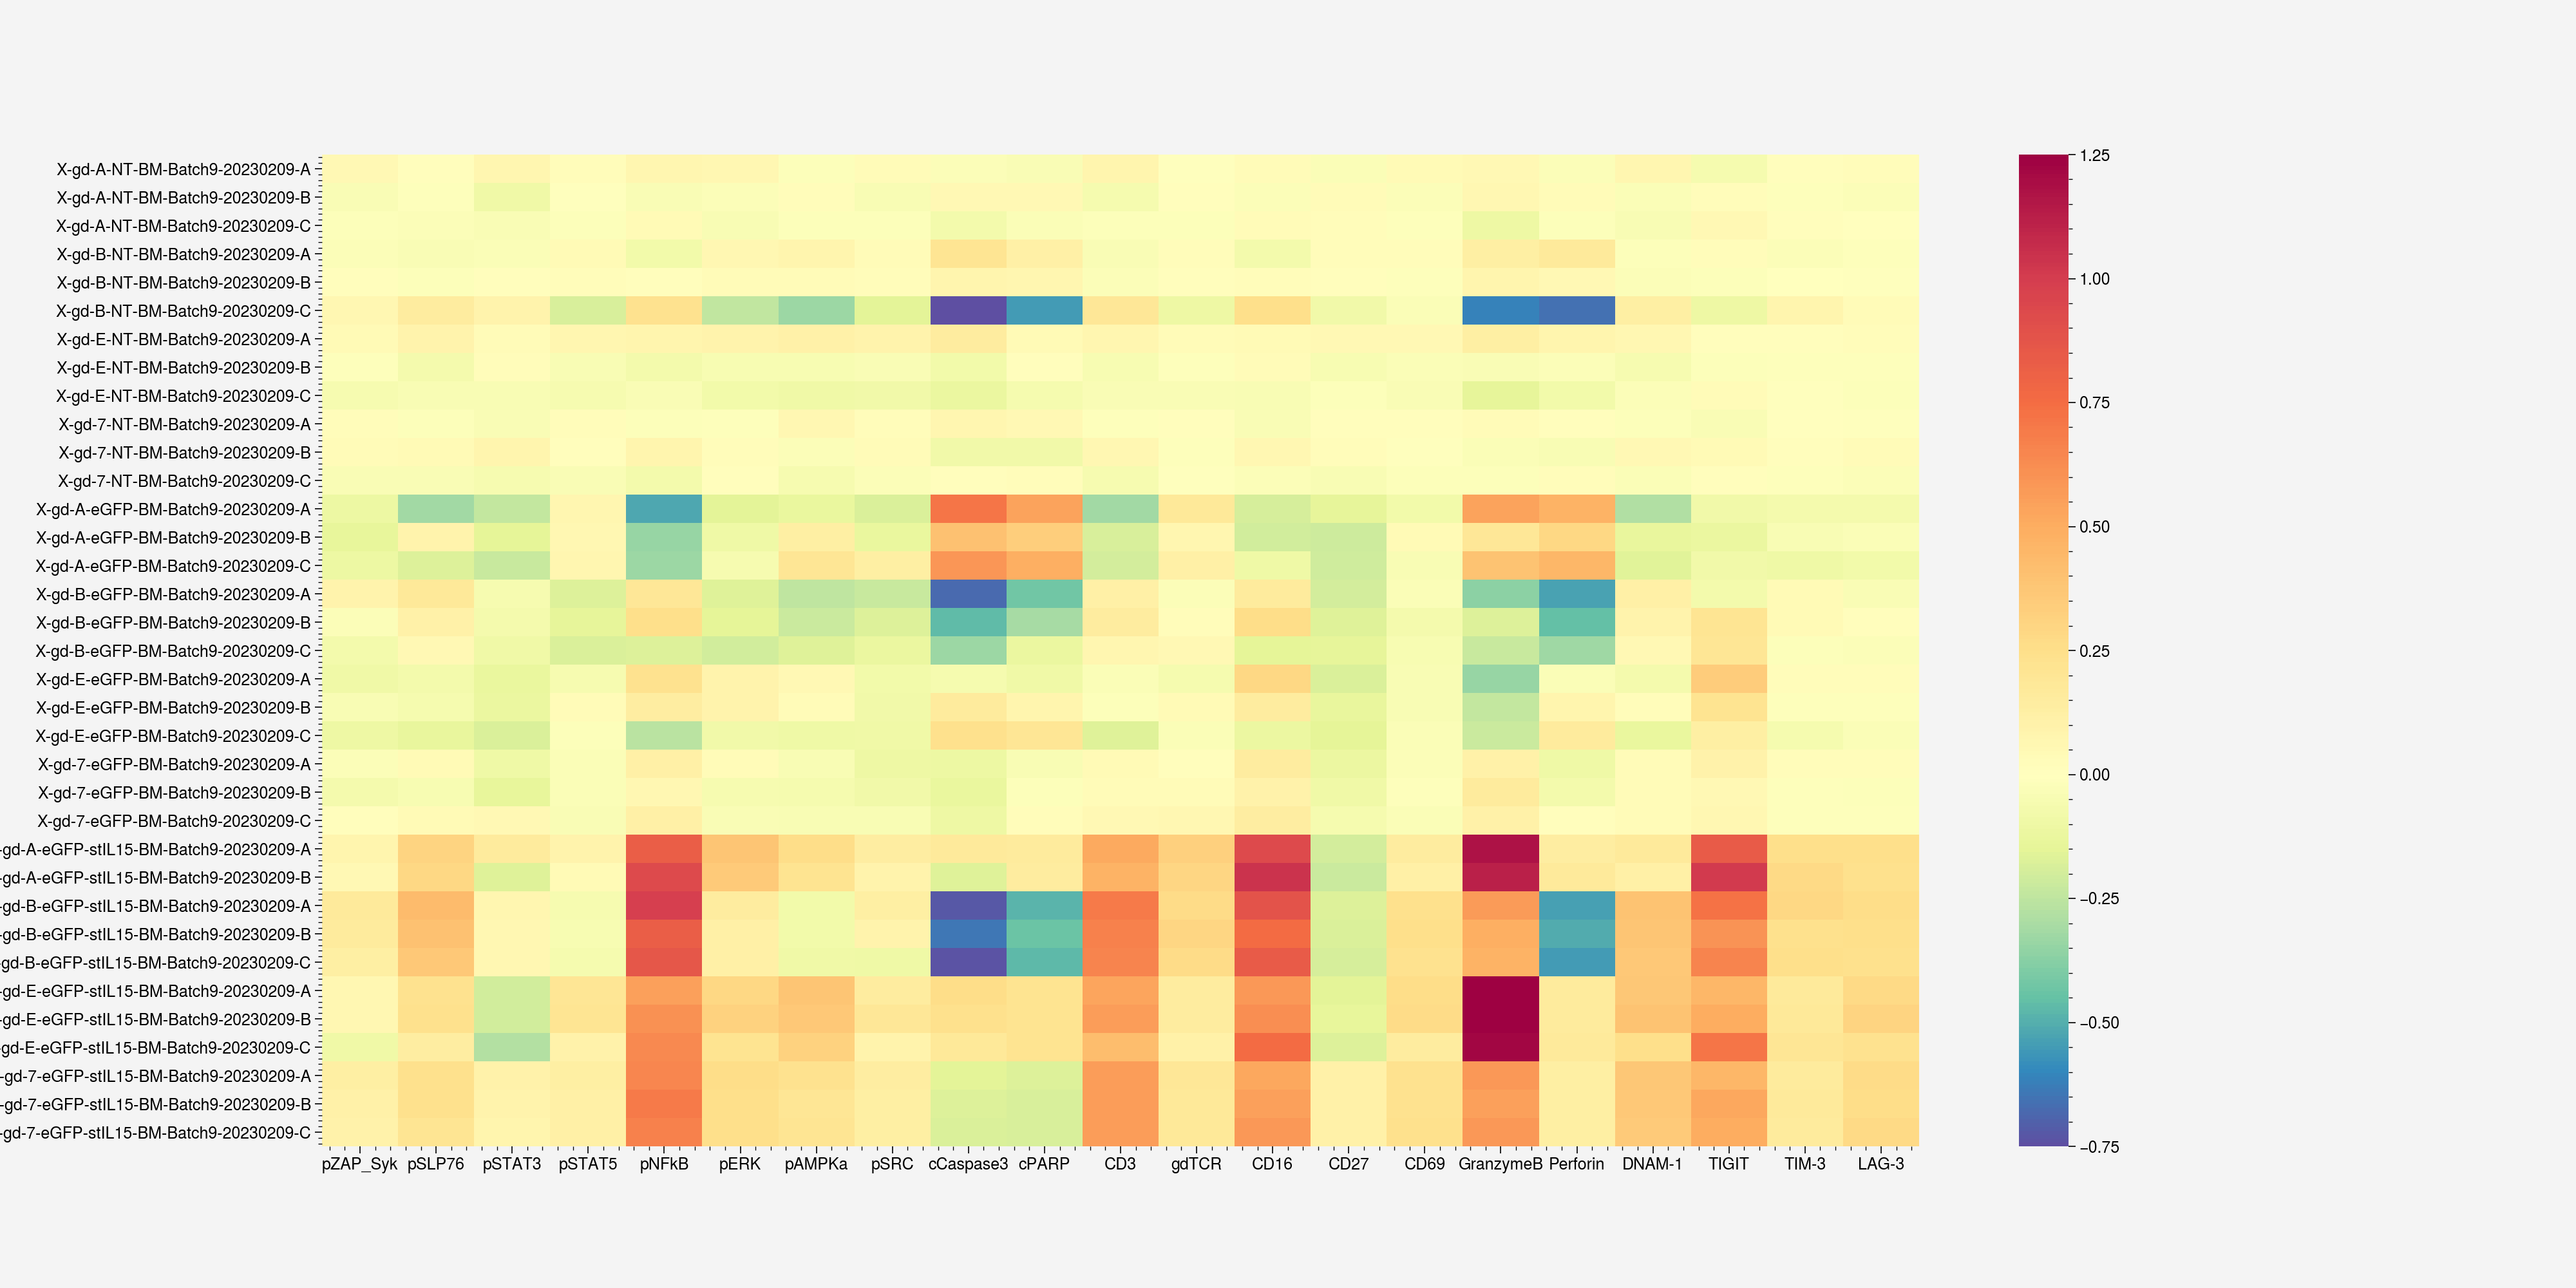

In [129]:
fig, ax = plt.subplots(figsize=(20, 10))
colormap=pplt.Colormap('Spectral_r')
offset = mcolors.TwoSlopeNorm(vmin=-0.75,vcenter=-0,vmax=1.25)
seaborn.heatmap(EMD_heatmap, cmap=colormap, norm=offset, )

plt.show()